In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd


In [3]:
path = '../DataFiles/AllMetadata.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,ASVspoof_ID,VCC_ID,VC_source_VCC_ID,VCTK_ID,VC_source_VCTK_ID,TTS_text,TTS_VC_target_speaker,Speaker_ID,File_ID,Codec,...,file_path,file_name,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
0,DF_E_2000011,NaN,NaN,-,-,It's quite nice.,p232,LA_0023,DF_E_2000011,nocodec,...,data/DF_E_2000011.flac,DF_E_2000011.flac,1.425062,16000,1,16,162216,4096,4096,22801
1,DF_E_2000013,-,SEF2_E30007,NaN,NaN,-,TEF2,TEF2,DF_E_2000013,low_m4a,...,data/DF_E_2000013.flac,DF_E_2000013.flac,3.200000,16000,1,16,165967,4096,4096,51200
2,DF_E_2000024,-,SEF1_E30006,NaN,NaN,-,TGF1,TGF1,DF_E_2000024,mp3m4a,...,data/DF_E_2000024.flac,DF_E_2000024.flac,1.856000,16000,1,16,160650,4096,4096,29696
3,DF_E_2000026,NaN,NaN,-,-,"It is not an option, but a policy requirement.",p261,LA_0043,DF_E_2000026,mp3m4a,...,data/DF_E_2000026.flac,DF_E_2000026.flac,2.944000,16000,1,16,146573,4096,4096,47104
4,DF_E_2000027,NaN,NaN,-,-,But they will need to play to score.,p304,LA_0021,DF_E_2000027,mp3m4a,...,data/DF_E_2000027.flac,DF_E_2000027.flac,1.856000,16000,1,16,130224,4096,4096,29696


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611829 entries, 0 to 611828
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ASVspoof_ID            611829 non-null  object 
 1   VCC_ID                 452133 non-null  object 
 2   VC_source_VCC_ID       452133 non-null  object 
 3   VCTK_ID                159696 non-null  object 
 4   VC_source_VCTK_ID      159696 non-null  object 
 5   TTS_text               611829 non-null  object 
 6   TTS_VC_target_speaker  611829 non-null  object 
 7   Speaker_ID             611829 non-null  object 
 8   File_ID                611829 non-null  object 
 9   Codec                  611829 non-null  object 
 10  Dataset                611829 non-null  object 
 11  System_ID              611829 non-null  object 
 12  Label                  611829 non-null  object 
 13  Trim                   611829 non-null  object 
 14  Protocol               611829 non-nu

In [7]:
df.describe()

,duration,sample_rate,channels,bit_depth,bitrate,min_blockSize,max_blockSize,total_samples
count,611829.000000,611829.0,611829.0,611829.0,611829.000000,611829.0,611829.0,611829.000000
mean,2.987372,16000.0,1.0,16.0,151756.658172,4096.0,4096.0,47797.950571
std,1.269190,0.0,0.0,0.0,15896.567566,0.0,0.0,20307.036558
min,0.354750,16000.0,1.0,16.0,66122.000000,4096.0,4096.0,5676.000000
25%,2.020000,16000.0,1.0,16.0,141984.000000,4096.0,4096.0,32320.000000
50%,2.760000,16000.0,1.0,16.0,152694.000000,4096.0,4096.0,44160.000000
75%,3.840000,16000.0,1.0,16.0,162837.000000,4096.0,4096.0,61440.000000
max,29.312000,16000.0,1.0,16.0,228142.000000,4096.0,4096.0,468992.000000


In [8]:
for column in df.columns:
    if df[column].nunique() <10:
        print(f"{column}: ",  df[column].unique() )

Codec:  ['nocodec' 'low_m4a' 'mp3m4a' 'low_mp3' 'high_m4a' 'high_ogg' 'low_ogg'
 'oggm4a' 'high_mp3']
Dataset:  ['asvspoof' 'vcc2020' 'vcc2018']
Label:  ['spoof' 'bonafide']
Trim:  ['notrim' 'trim']
Protocol:  ['progress' 'eval' 'hidden']
Vocoder:  ['traditional_vocoder' 'neural_vocoder_nonautoregressive'
 'neural_vocoder_autoregressive' 'bonafide' 'unknown'
 'waveform_concatenation']
Task_ID:  ['-' 'Task1' 'Task2' 'SPO' 'HUB']
File_Format:  ['-' 'FF' 'FM' 'MF' 'MM']
Gender:  ['-' 'E' 'G' 'M' 'F']
sample_rate:  [16000]
channels:  [1]
bit_depth:  [16]
min_blockSize:  [4096]
max_blockSize:  [4096]


In [9]:
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ASVspoof_ID: 611829
VCC_ID: 771
VC_source_VCC_ID: 381
VCTK_ID: 1524
VC_source_VCTK_ID: 649
TTS_text: 2388
TTS_VC_target_speaker: 75
Speaker_ID: 93
File_ID: 611829
Codec: 9
Dataset: 3
System_ID: 111
Label: 2
Trim: 2
Protocol: 3
Vocoder: 6
Task_ID: 5
Team_ID: 59
File_Format: 5
Gender: 5
file_path: 611829
file_name: 611829
duration: 20172
sample_rate: 1
channels: 1
bit_depth: 1
bitrate: 80771
min_blockSize: 1
max_blockSize: 1
total_samples: 20172


In [10]:
df['Label'].value_counts()

spoof       589212
bonafide     22617
Name: Label, dtype: int64

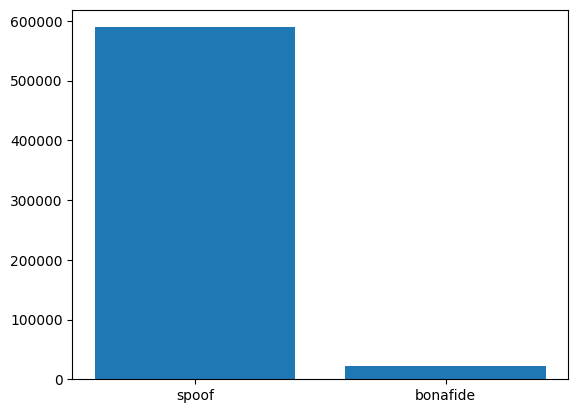

In [11]:
plt.bar(df['Label'].unique(), df['Label'].value_counts())
plt.show()

In [12]:
spoof_data = df[df['Label']=="spoof"]
bonafide_data = df[df['Label']=="bonafide"]

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [69]:
useful_numeric_columns = [column for column in numeric_columns if len(df[column].value_counts())>1]

dividir los datos de cada tipo de datos en columnas numericas y categoricas

In [24]:
spoof_columns = {"numerical":  spoof_data[numeric_columns], "categorical": spoof_data[categorical_columns]}
bonafide_columns = {"numerical":  bonafide_data[numeric_columns], "categorical": bonafide_data[categorical_columns]}

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
spoof_columns["numerical"].columns


Index(['duration', 'sample_rate', 'channels', 'bit_depth', 'bitrate',
       'min_blockSize', 'max_blockSize', 'total_samples'],
      dtype='object')

In [39]:
import math

In [70]:
def CreateHistPlots(data):
    # Get the columns with more than one unique value
    columns_to_plot = useful_numeric_columns

    # Calculate the number of rows and columns for the subplots grid
    num_columns = 3  # You can adjust this number to control the layout
    num_rows = math.ceil(len(columns_to_plot) / num_columns)

    # Create subplots with the calculated number of rows and columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))

    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten()

    # Plot each column in its respective subplot
    for i, column in enumerate(columns_to_plot):
        
        ax = sns.histplot(data["numerical"][column], ax=axes[i], kde=True)
        ax.lines[0].set_color('crimson')
        mean_value = data["numerical"][column].mean()
        axes[i].axvline(mean_value, color='blue', linestyle='--', label=f'Mean: {mean_value:.2f}')  # Mean in blue dashed line
        axes[i].set_title(column)
        axes[i].legend()  # Add a legend to indicate the mean line


    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

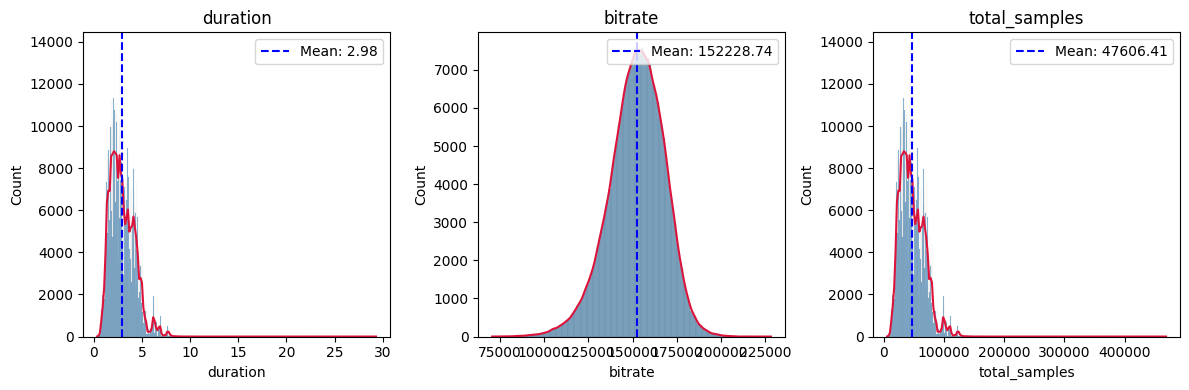

In [71]:
CreateHistPlots(spoof_columns)

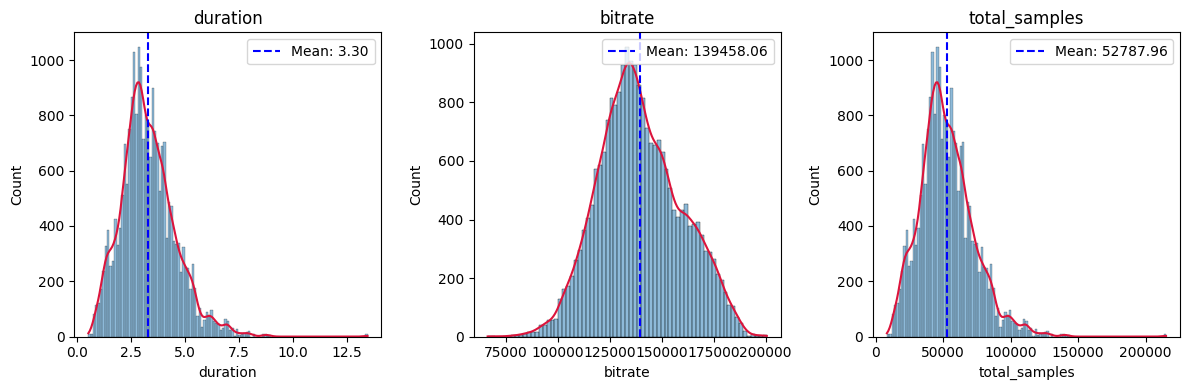

In [57]:
CreateHistPlots(bonafide_columns)

In [66]:
spoof_columns["numerical"][useful_numeric_columns].corr()

,duration,bitrate,total_samples
duration,1.000000,-0.144773,1.000000
bitrate,-0.144773,1.000000,-0.144773
total_samples,1.000000,-0.144773,1.000000


In [67]:
bonafide_columns["numerical"][useful_numeric_columns].corr()

,duration,bitrate,total_samples
duration,1.000000,-0.277876,1.000000
bitrate,-0.277876,1.000000,-0.277876
total_samples,1.000000,-0.277876,1.000000


In [68]:
df[useful_numeric_columns].corr()

,duration,bitrate,total_samples
duration,1.00000,-0.15612,1.00000
bitrate,-0.15612,1.00000,-0.15612
total_samples,1.00000,-0.15612,1.00000


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of 'Label' column (Spoof vs. Genuine):
spoof       589212
bonafide     22617
Name: Label, dtype: int64


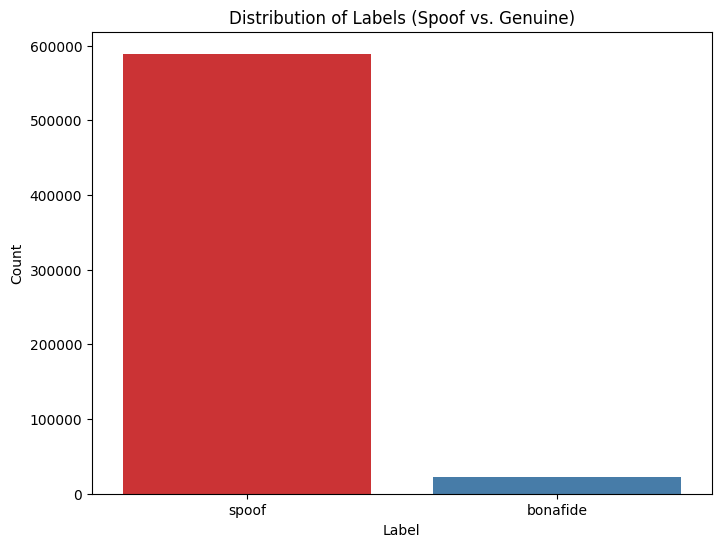

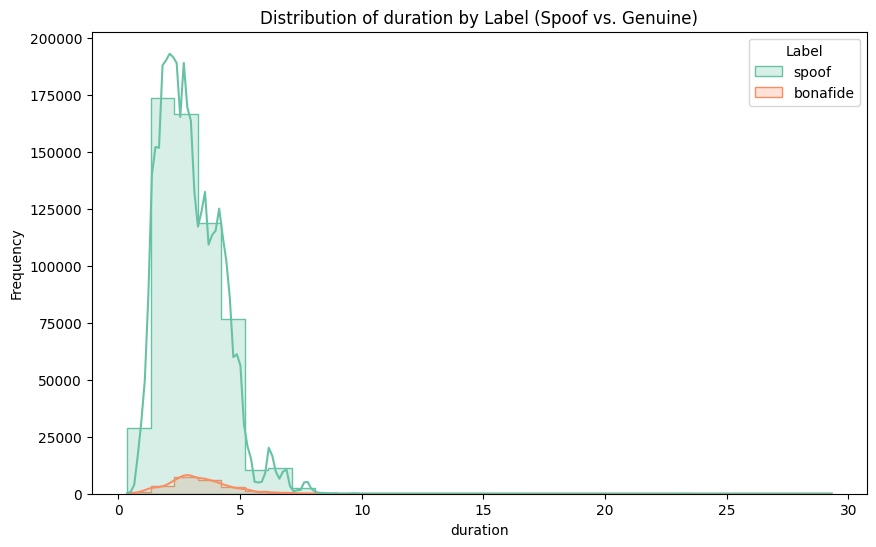

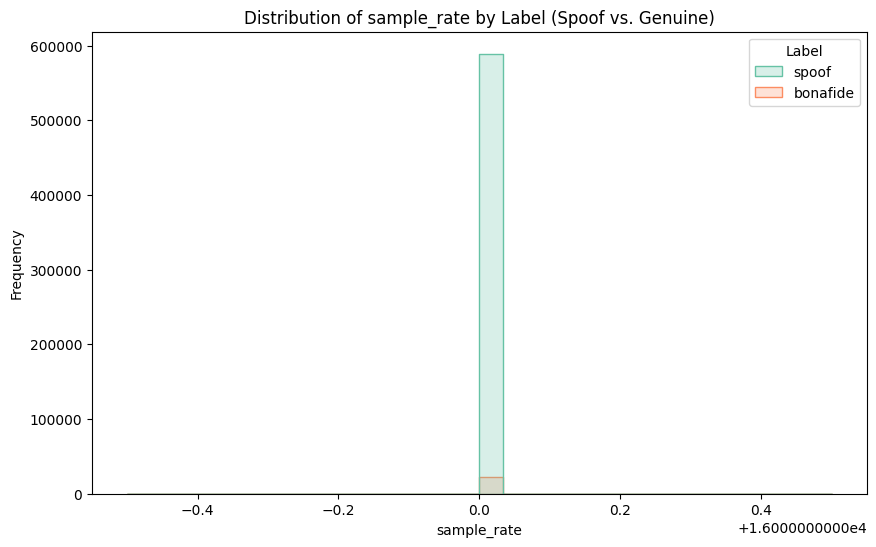

LinAlgError: singular matrix

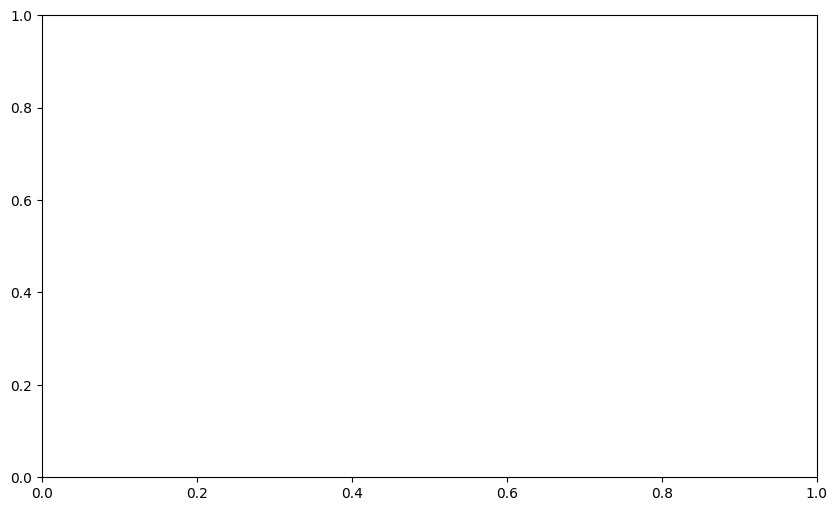

In [14]:


# Analyzing the 'Label' column to check for the distribution of spoofed vs genuine data
if 'Label' in df.columns:
    print("\nDistribution of 'Label' column (Spoof vs. Genuine):")
    print(df['Label'].value_counts())

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Label', data=df, palette='Set1')
    plt.title('Distribution of Labels (Spoof vs. Genuine)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

    # Histograms of numerical variables depending on whether the data is spoofed or not
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, hue='Label', kde=True, bins=30, palette='Set2', element='step')
        plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplots of numerical variables to compare distributions between spoofed and genuine
    for col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Label', y=col, data=df, palette='Set3')
        plt.title(f'Boxplot of {col} by Label (Spoof vs. Genuine)')
        plt.xlabel('Label')
        plt.ylabel(col)
        plt.show()

    # Correlation between numeric variables, separated by Label
    genuine_data = df[df['Label'] == 'genuine']
    spoof_data = df[df['Label'] == 'spoof']

    plt.figure(figsize=(14, 7))
    sns.heatmap(genuine_data[numeric_columns].corr(), annot=True, cmap='Blues')
    plt.title('Correlation Heatmap (Genuine Data)')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.heatmap(spoof_data[numeric_columns].corr(), annot=True, cmap='Reds')
    plt.title('Correlation Heatmap (Spoof Data)')
    plt.show()

    # Analysis of categorical variables (if they exist) in relation to Label
    for col in categorical_columns:
        if col != 'Label':
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, hue='Label', data=df, palette='Set1', order=df[col].value_counts().index)
            plt.title(f'Distribution of {col} by Label (Spoof vs. Genuine)')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.show()

            # Cross-tabulation analysis
            print(f"\nCross-tabulation of 'Label' with '{col}':")
            cross_tab = pd.crosstab(df['Label'], df[col], normalize='index')
            print(cross_tab)

            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
            plt.title(f"Cross-tabulation: 'Label' Across {col}")
            plt.ylabel('Proportion')
            plt.show()

    # Advanced Analysis: Interaction between two categorical variables and their relationship with 'Label'
    for i, cat_col1 in enumerate(categorical_columns):
        for cat_col2 in categorical_columns[i+1:]:
            if cat_col1 != 'Label' and cat_col2 != 'Label':
                print(f"\nInteraction between {cat_col1} and {cat_col2}:")
                interaction = pd.crosstab([df[cat_col1], df[cat_col2]], df['Label'], normalize='index')
                print(interaction)

                interaction.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Accent')
                plt.title(f"Interaction between {cat_col1} and {cat_col2} by Label")
                plt.ylabel('Proportion')
                plt.show()

# Final Summary: Key Insights and Anomalies Detected
print("\nFinal Summary and Key Insights:")

In [16]:
bonafide_data["sample_rate"].value_counts()
spoof_data["sample_rate"].value_counts()

16000    589212
Name: sample_rate, dtype: int64